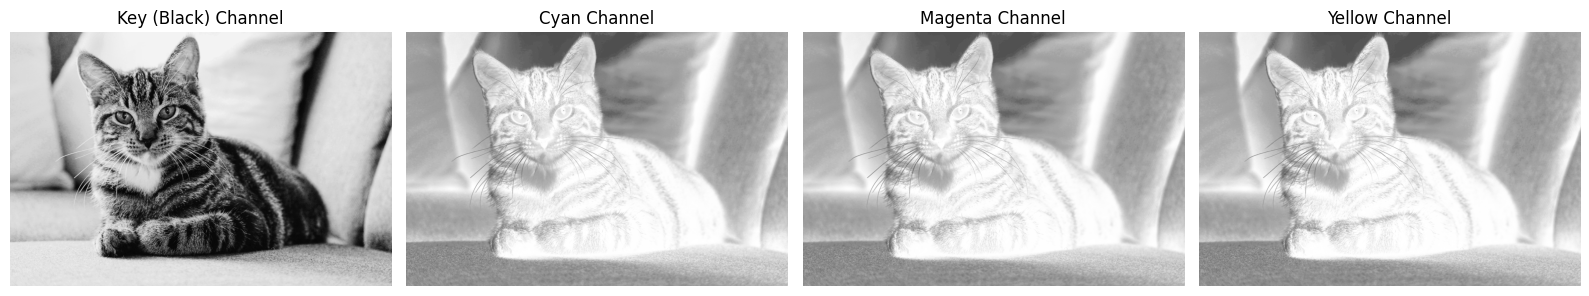

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 이미지 파일 읽기
image = cv2.imread('example.jpg')

# BGR -> RGB로 변환 (OpenCV는 BGR 형식으로 이미지를 읽음)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGB -> CMYK 변환
rgb_normalized = rgb_image / 255.0
c = 1 - rgb_normalized[..., 0]
m = 1 - rgb_normalized[..., 1]
y = 1 - rgb_normalized[..., 2]
k = np.min(rgb_normalized, axis=-1)
c = (c - k) / (1 - k + 1e-10)
m = (m - k) / (1 - k + 1e-10)
y = (y - k) / (1 - k + 1e-10)

# CMYK 채널을 리스트로 생성, Key (Black)을 맨 앞에 배치
cmyk_array = [k, c, m, y]
channels = ['Key (Black)', 'Cyan', 'Magenta', 'Yellow']

# CMYK 채널을 분리하여 시각화
rows = 1
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))

# zip을 사용하여 cmyk_array와 axes를 묶음
for channel, ax, title in zip(cmyk_array, axes, channels):
    ax.imshow(channel, cmap='gray')
    ax.set_title(f'{title} Channel')
    ax.axis('off')
pass

plt.tight_layout()
plt.show()
